In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('titanic-master-table.csv')
df.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Name', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'is-Pclass-1', 'is-Pclass-2', 'is-Sex-male',
       'is-Embarked-S', 'is-Embarked-C', 'family_size'],
      dtype='object')

In [3]:
y = df['Survived']
X = df[['Age', 'SibSp','Parch',  'Fare', 'is-Pclass-1', 'is-Pclass-2', 'is-Sex-male','is-Embarked-S', 'is-Embarked-C', 'family_size']]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [6]:
clf = [
    (LogisticRegression(), 'reg-log' ),
    (DecisionTreeClassifier(), 'arbol-class' )
]

In [7]:
import joblib
from sklearn.metrics import accuracy_score

for model, name in clf:
    
    #Entrenar
    model.fit(X_train,y_train)
    
    #Medir
    y_pred = model.predict(X_test)
    accuracy = accuracy_score( y_test, y_pred)
    print(name)
    print('Resultado en la prueba del modelo :', round(accuracy*100, 2), '%')
    
    #Guardar
    job_file = 'modelo-'+name+'.pkl'
    joblib.dump(model, job_file)

reg-log
Resultado en la prueba del modelo : 79.35 %
arbol-class
Resultado en la prueba del modelo : 76.09 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0, 0.5, 'Genero')

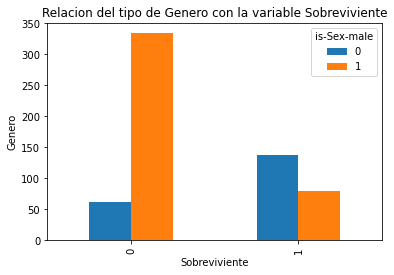

In [12]:
pd.crosstab(df['Survived'], df['is-Sex-male']).plot(kind="bar")
plt.title("Relacion del tipo de Genero con la variable Sobreviviente")
plt.xlabel("Sobreviviente")
plt.ylabel("Genero")

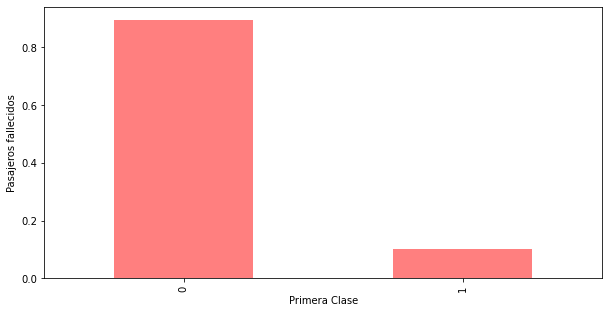

In [13]:
figura = plt.figure(figsize=(10,5))
df['is-Pclass-1'][df['Survived'] == 0].value_counts(normalize = True).plot(kind = 'bar', alpha = 0.5, color = 'red')
plt.ylabel("Pasajeros fallecidos")
plt.xlabel("Primera Clase")
plt.show()

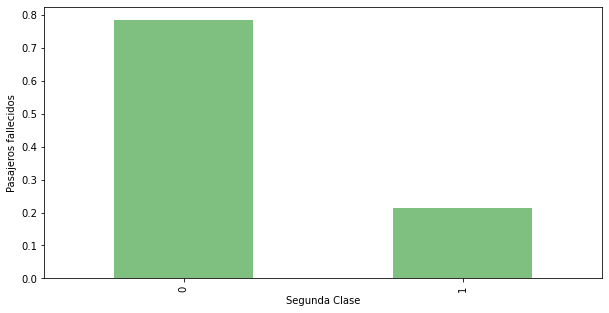

In [14]:
figura = plt.figure(figsize=(10,5))
df['is-Pclass-2'][df['Survived'] == 0].value_counts(normalize = True).plot(kind = 'bar', alpha = 0.5, color = 'green')
plt.ylabel("Pasajeros fallecidos")
plt.xlabel("Segunda Clase")
plt.show()